In [1]:
import cv2 
print (cv2.__version__)
import matplotlib.pyplot as plt


4.5.3


2 version of open CV were installed, removed the 3.4 version as it didn't support dnn_DetectionModel 

refer to this link for more information on Tensor flow object detection API - https://github.com/opencv/opencv/wiki/TensorFlow-Object-Detection-API

In [2]:
config_file = "ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model = "frozen_inference_graph.pb"

In [3]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)


In [4]:
classLabels = []
file_name = 'labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
    

In [5]:
print (classLabels)
print (len(classLabels))

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
80


In [6]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean(127.5)
model.setInputSwapRB(True)

<dnn_Model 0x11f029c10>

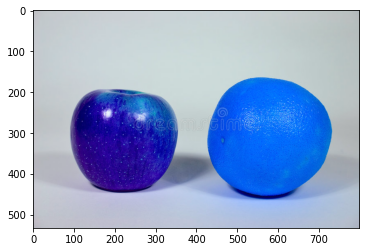

In [7]:
img = cv2.imread('appleorange.jpeg')
plt.imshow(img)

In [15]:
ClassIndex, confidence, bbox = model.detect(img,confThreshold = 0.70)
print (ClassIndex)

[[55]]


In [16]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(),bbox):
    #image = cv2.rectangle(image, start_point, end_point, color, thickness)
    cv2.rectangle(img,boxes,(255,0,0),2)
    #cv2.putText(image, text, org, font, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])
    cv2.putText(img,classLabels[ClassInd -1], (boxes[0] + 10,boxes[1]+40),font, fontScale = font_scale, color = (0,255,0), thickness = 3 )

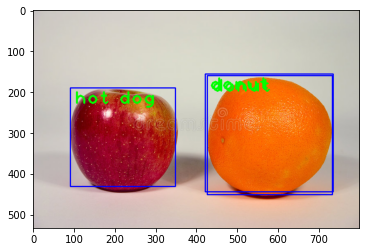

In [17]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
